https://medium.com/tebs-lab/how-to-classify-mnist-digits-with-different-neural-network-architectures-39c75a0f03e3

In [1]:
from collections import Counter

import keras
from keras.datasets import mnist
from keras.layers import Dense # Dense layers are "fully connected" layers
from keras.models import Sequential # Documentation: https://keras.io/models/sequential/
from keras_visualizer import visualizer

import numpy as np

from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

2023-07-06 17:27:07.601359: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-07-06 17:27:07.604109: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-06 17:27:07.663541: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-06 17:27:07.665892: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-06 17:27:08.738922: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

In [2]:
# Setup train and test splits
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print("Training data shape: ", X_train.shape) # (60000, 28, 28) -- 60000 images, each 28x28 pixels
print("Test data shape", X_test.shape) # (10000, 28, 28) -- 10000 images, each 28x28

Training data shape:  (60000, 28, 28)
Test data shape (10000, 28, 28)


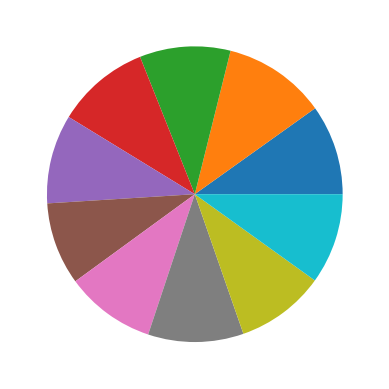

In [3]:
# This is a nicely balanced dataset, so we're not going to have to deal with that problem
label_counts_dict = Counter(y_train)
plt.pie(dict(sorted(label_counts_dict.items())).values())
plt.show()

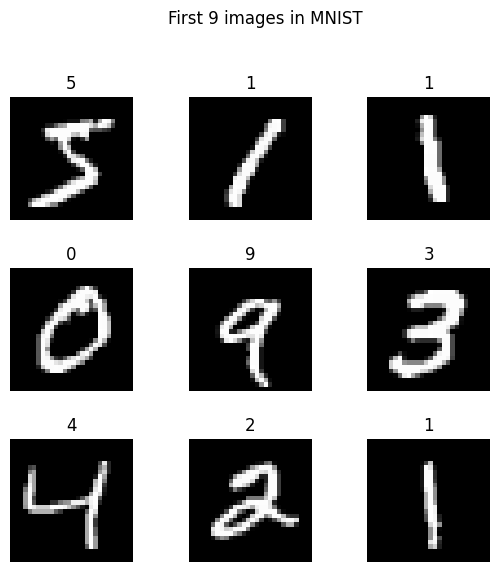

In [4]:
# plot first 3^k+1 images in MNIST
k = 1
fig, ax = plt.subplots(3 * k, 3 * k, figsize = (2 * 3 * k, 2 * 3 * k))
fig.suptitle(f'First {3*k * 3*k} images in MNIST')
fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
for x, y in [(i, j) for i in range(3*k) for j in range(3 * k)]:
    ax[x, y].imshow(X_train[x + y * 3 * k].reshape((28, 28)), cmap = 'gray')
    ax[x, y].set_title(y_train[x + y * 3 * k])
    ax[x, y].set_axis_off()

In [5]:
# Flatten the images
# We don't want a 28 * 28 input layer (in this example but we do for convnets)
# We want a [28^2] input layer
image_vector_size = 28*28
X_train = X_train.reshape(X_train.shape[0], image_vector_size)
X_test = X_test.reshape(X_test.shape[0], image_vector_size)

In [6]:
X_train[0][150:180]

array([  0,   0,   3,  18,  18,  18, 126, 136, 175,  26, 166, 255, 247,
       127,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        30,  36,  94, 154], dtype=uint8)

In [7]:
print("Training label shape: ", y_train.shape) # (60000,) -- 60000 numbers (all 0-9)
print("First 5 training labels: ", y_train[:5]) # [5, 0, 4, 1, 9]

# These are ordinals. Not only does 3 != 5, 3 < 5. We don't want that. We need to fix that
# We'll use one-hot encoding
# Convert to "one-hot" vectors using the to_categorical function
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print("First 5 training lables as one-hot encoded vectors:\n", y_train[:5])

Training label shape:  (60000,)
First 5 training labels:  [5 0 4 1 9]
First 5 training lables as one-hot encoded vectors:
 [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [8]:
# let's build a fully connected model with one hidden layer
image_size = 784 # 28*28
num_classes = 10 # ten unique digits

model = Sequential()

# The input layer requires the special input_shape parameter which should match
# the shape of our training data.
model.add(Dense(units=32, activation='sigmoid', input_shape=(image_size,)))
model.add(Dense(units=num_classes, activation='softmax'))
print(model.summary())
visualizer(model, file_format='png')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                25120     
                                                                 
 dense_1 (Dense)             (None, 10)                330       
                                                                 
Total params: 25450 (99.41 KB)
Trainable params: 25450 (99.41 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [9]:
model.compile(optimizer="sgd", loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, batch_size=128, epochs=5, verbose=True, validation_split=.1)
loss, accuracy  = model.evaluate(X_test, y_test)

Epoch 1/5
422/422 [==============================] - 2s 3ms/step - loss: 1.4112 - accuracy: 0.6114 - val_loss: 0.9735 - val_accuracy: 0.8157
Epoch 2/5
422/422 [==============================] - 1s 3ms/step - loss: 0.8771 - accuracy: 0.8181 - val_loss: 0.7027 - val_accuracy: 0.8675
Epoch 3/5
422/422 [==============================] - 1s 3ms/step - loss: 0.6887 - accuracy: 0.8536 - val_loss: 0.5676 - val_accuracy: 0.8862
Epoch 4/5
422/422 [==============================] - 1s 2ms/step - loss: 0.5885 - accuracy: 0.8695 - val_loss: 0.4865 - val_accuracy: 0.9020
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.4916 - accuracy: 0.8869


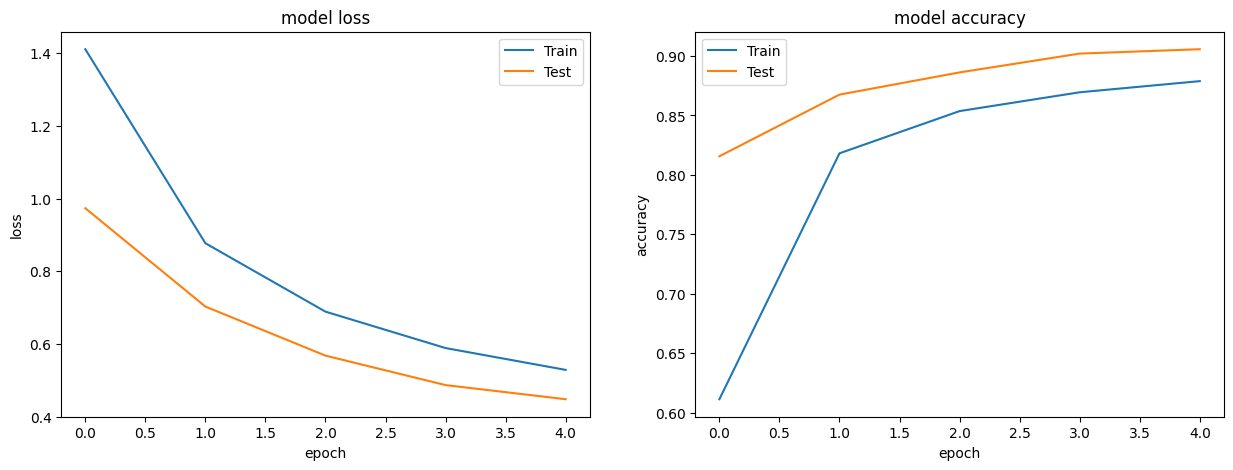

Test loss: 0.492
Test accuracy: 0.887


In [10]:
fig, axs = plt.subplots(1, 2, figsize=(15,5))
axs[0].plot(history.history['loss'], label="Train")
axs[0].plot(history.history['val_loss'], label="Test")
axs[0].set_title('model loss')
axs[0].set_ylabel('loss')
axs[0].set_xlabel('epoch')
axs[0].legend()
axs[1].plot(history.history['accuracy'], label="Train")
axs[1].plot(history.history['val_accuracy'], label="Test")
axs[1].set_title('model accuracy')
axs[1].set_ylabel('accuracy')
axs[1].set_xlabel('epoch')
axs[1].legend()
plt.show()

print(f'Test loss: {loss:.3}')
print(f'Test accuracy: {accuracy:.3}')

In [11]:
predictions = [prediction.argmax(axis=0) for prediction in model.predict(X_test)]
labels = [label.argmax(axis=0) for label in y_test]
cm = confusion_matrix(labels, predictions)

313/313 [==============================] - 1s 1ms/step


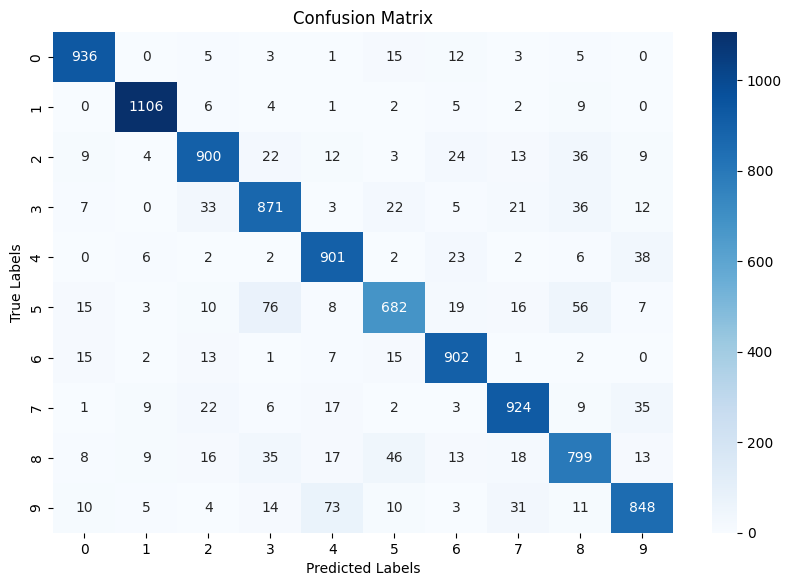

In [12]:
# Define class labels
class_labels = range(10)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(10, 6.5))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [13]:
# it had a hard time with 5s that looked like 3s. Let's look at some hits and some misses

# I have been ruined by spending too much time in functional program languages like scheme
# don't be like me
label_5_indices = set(np.where(np.array(labels) == 5)[0])
pred_3_indices = set(np.where(np.array(predictions) == 3)[0])
misses = list(label_5_indices.intersection(pred_3_indices))
rows = len(misses) // 10
leftover = len(misses) % 10

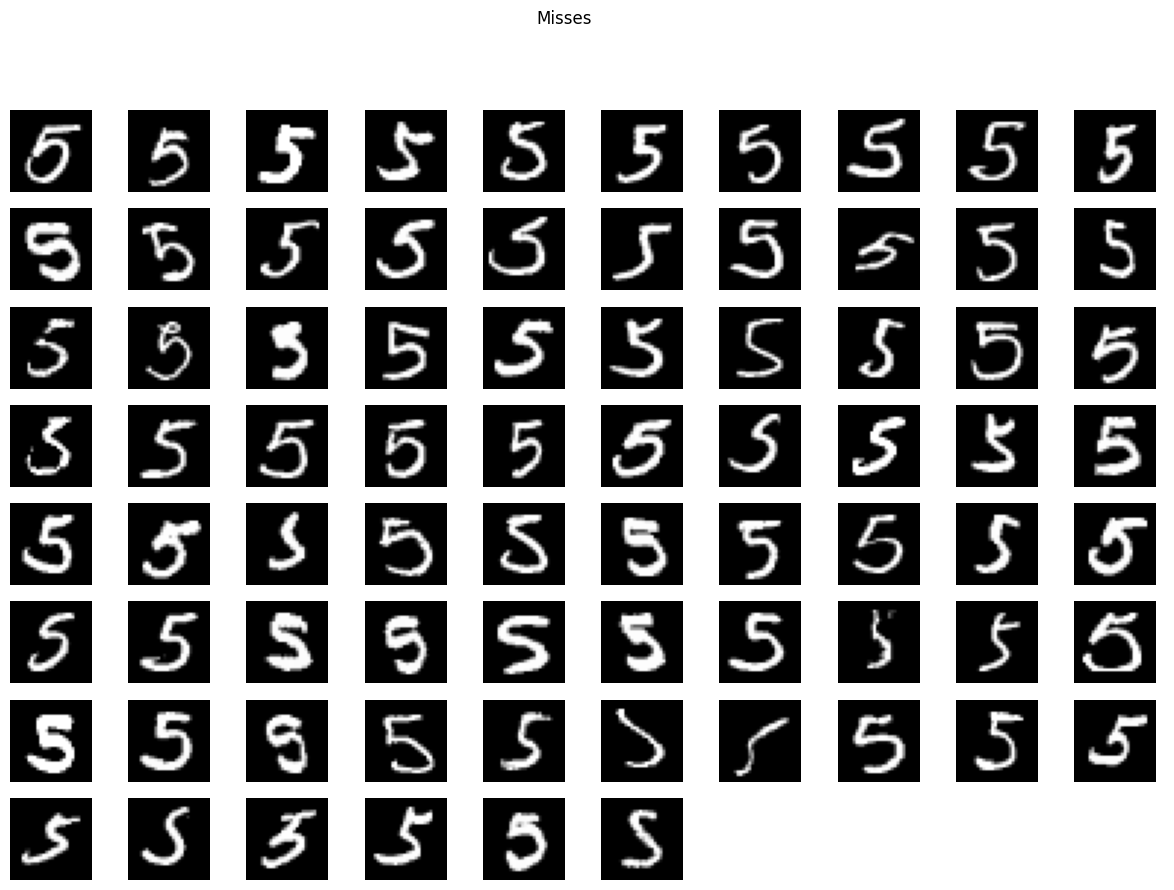

In [14]:
fig, ax = plt.subplots(rows+1, 10, figsize = (15, 10))
fig.suptitle(f'Misses')
for i in range(rows):
    for j in range(10):
        ax[i, j].imshow(X_test[misses[j + i * 10]].reshape((28, 28)), cmap = 'gray')
        ax[i, j].set_axis_off()
for j in range(leftover):
    ax[rows, j].imshow(X_test[misses[j + rows * 10]].reshape((28, 28)), cmap = 'gray')
    ax[rows, j].set_axis_off()
for j in range(leftover, 10):
    ax[rows, j].set_axis_off()
plt.show()

In [15]:
# it had a hard time with 5s that looked like 3s. Let's look at some hits and some misses

# I have been ruined by spending too much time in functional program languages like scheme
# don't be like me
label_5_indices = set(np.where(np.array(labels) == 5)[0])
pred_5_indices = set(np.where(np.array(predictions) == 5)[0])
hits = list(label_5_indices.intersection(pred_5_indices))
len(hits)

682

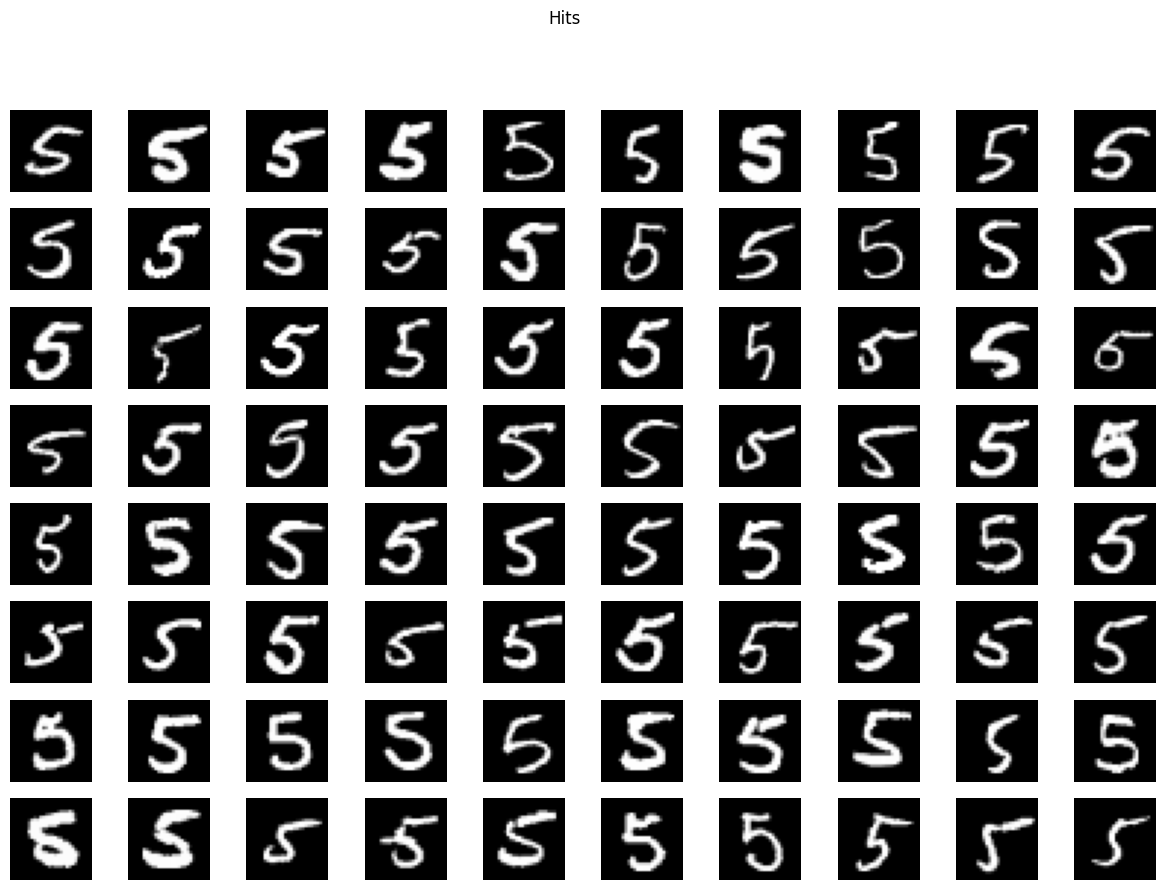

In [16]:
fig, ax = plt.subplots(rows+1, 10, figsize = (15, 10))
fig.suptitle(f'Hits')
for i in range(rows+1):
    for j in range(10):
        ax[i, j].imshow(X_test[hits[j + i * 10]].reshape((28, 28)), cmap = 'gray')
        ax[i, j].set_axis_off()
plt.show()

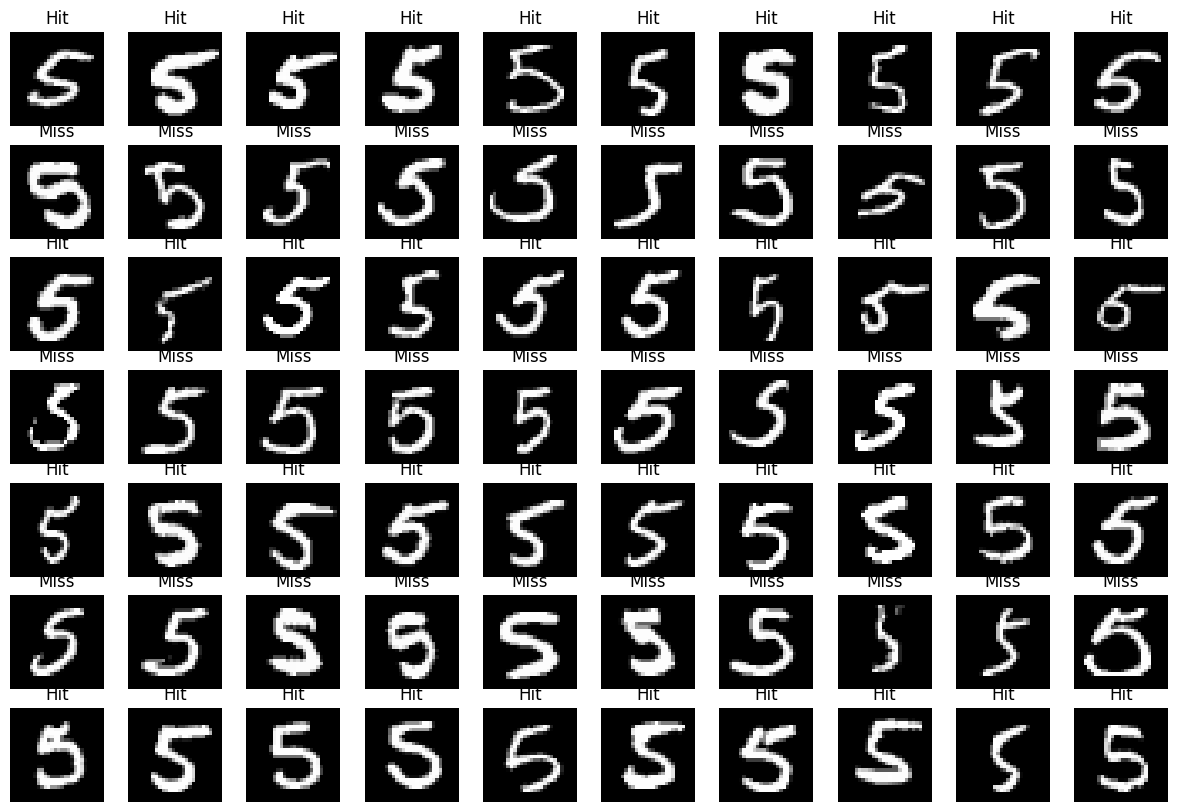

In [17]:
fig, ax = plt.subplots(rows, 10, figsize = (15, 10))
for i in range(rows):
    if i % 2 == 0:
        for j in range(10):
            ax[i, j].imshow(X_test[hits[j + i * 10]].reshape((28, 28)), cmap = 'gray')
            ax[i, j].set_title("Hit")
            ax[i, j].set_axis_off()
    else:
        for j in range(10):
            ax[i, j].imshow(X_test[misses[j + i * 10]].reshape((28, 28)), cmap = 'gray')
            ax[i, j].set_title("Miss")
            ax[i, j].set_axis_off()
plt.show()